# 🍄 **Midterm Project: Classification of Mushrooms**

## 🧑‍💻 Author: Justin Schroder

## 📅 Date: April 4, 2025

## Introduction:


---

## Section 1: Import and Inspect the Data
### 1.1 Library Imports

In [191]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

### 1.2 Load the Dataset 

In [192]:
# Load the dataset
df = pd.read_csv(r'C:\Projects\applied-ml-projects\ml-04-mushroom-classification\mushroom_dataset\agaricus-lepiota.data', header=0)

# Display the first 10 rows to verify
df.head(10)

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
p,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
e,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
e,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
p,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
e,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
e,x,y,y,t,a,f,c,b,n,e,...,s,w,w,p,w,o,p,k,n,g
e,b,s,w,t,a,f,c,b,g,e,...,s,w,w,p,w,o,p,k,n,m
e,b,y,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,s,m
p,x,y,w,t,p,f,c,n,p,e,...,s,w,w,p,w,o,p,k,v,g
e,b,s,y,t,a,f,c,b,g,e,...,s,w,w,p,w,o,p,k,s,m


Variable Information:
1. cap-shape:                bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?:                 bruises=t,no=f
5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment:          attached=a,descending=d,free=f,notched=n
7. gill-spacing:             close=c,crowded=w,distant=d
8. gill-size:                broad=b,narrow=n
9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape:              enlarging=e,tapering=t
11. stalk-root:               bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type:                partial=p,universal=u
17. veil-color:               brown=n,orange=o,white=w,yellow=y
18. ring-number:              none=n,one=o,two=t
19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population:               abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

### 1.3 Check for Missing Values and Display Summary Statistics

In [193]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Summary statistics for all columns
print("\nSummary Statistics:")
print(df.describe(include='all').T)

# Check for any '?' values in the 'stalk-root' column
print(f"Count of '?' in stalk-root: {(df['stalk-root'.strip()] == '?').sum()}")


Missing Values:
 cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Summary Statistics:
                         count unique top  freq
cap-shape                 8124      6   x  3656
cap-surface               8124      4   y  3244
cap-color                 8124     10   n  2284
bruises?                  8124      2   f  4748
odor                      8124      9   n  3528
g

## 💭 Reflection 1: What do you notice about the dataset? Are there any data issues?

* No missing values in the dataset, but the stalk-root column has 2,480 instances of '?', representing possible unknown/missing data.
* Categorical data: The dataset consists of categorical features (e.g., cap-shape, odor, gill-color), which are suitable for classification tasks.
* Inconsistent missing data representation: The '?' values should be handled (e.g., replaced or removed).
* Preprocessing required: Categorical features need encoding, and potential data imbalances or outliers should be checked.

---

## Section 2. Data Exploration and Preparation

### 2.1 Explore Data Patterns and Distributions

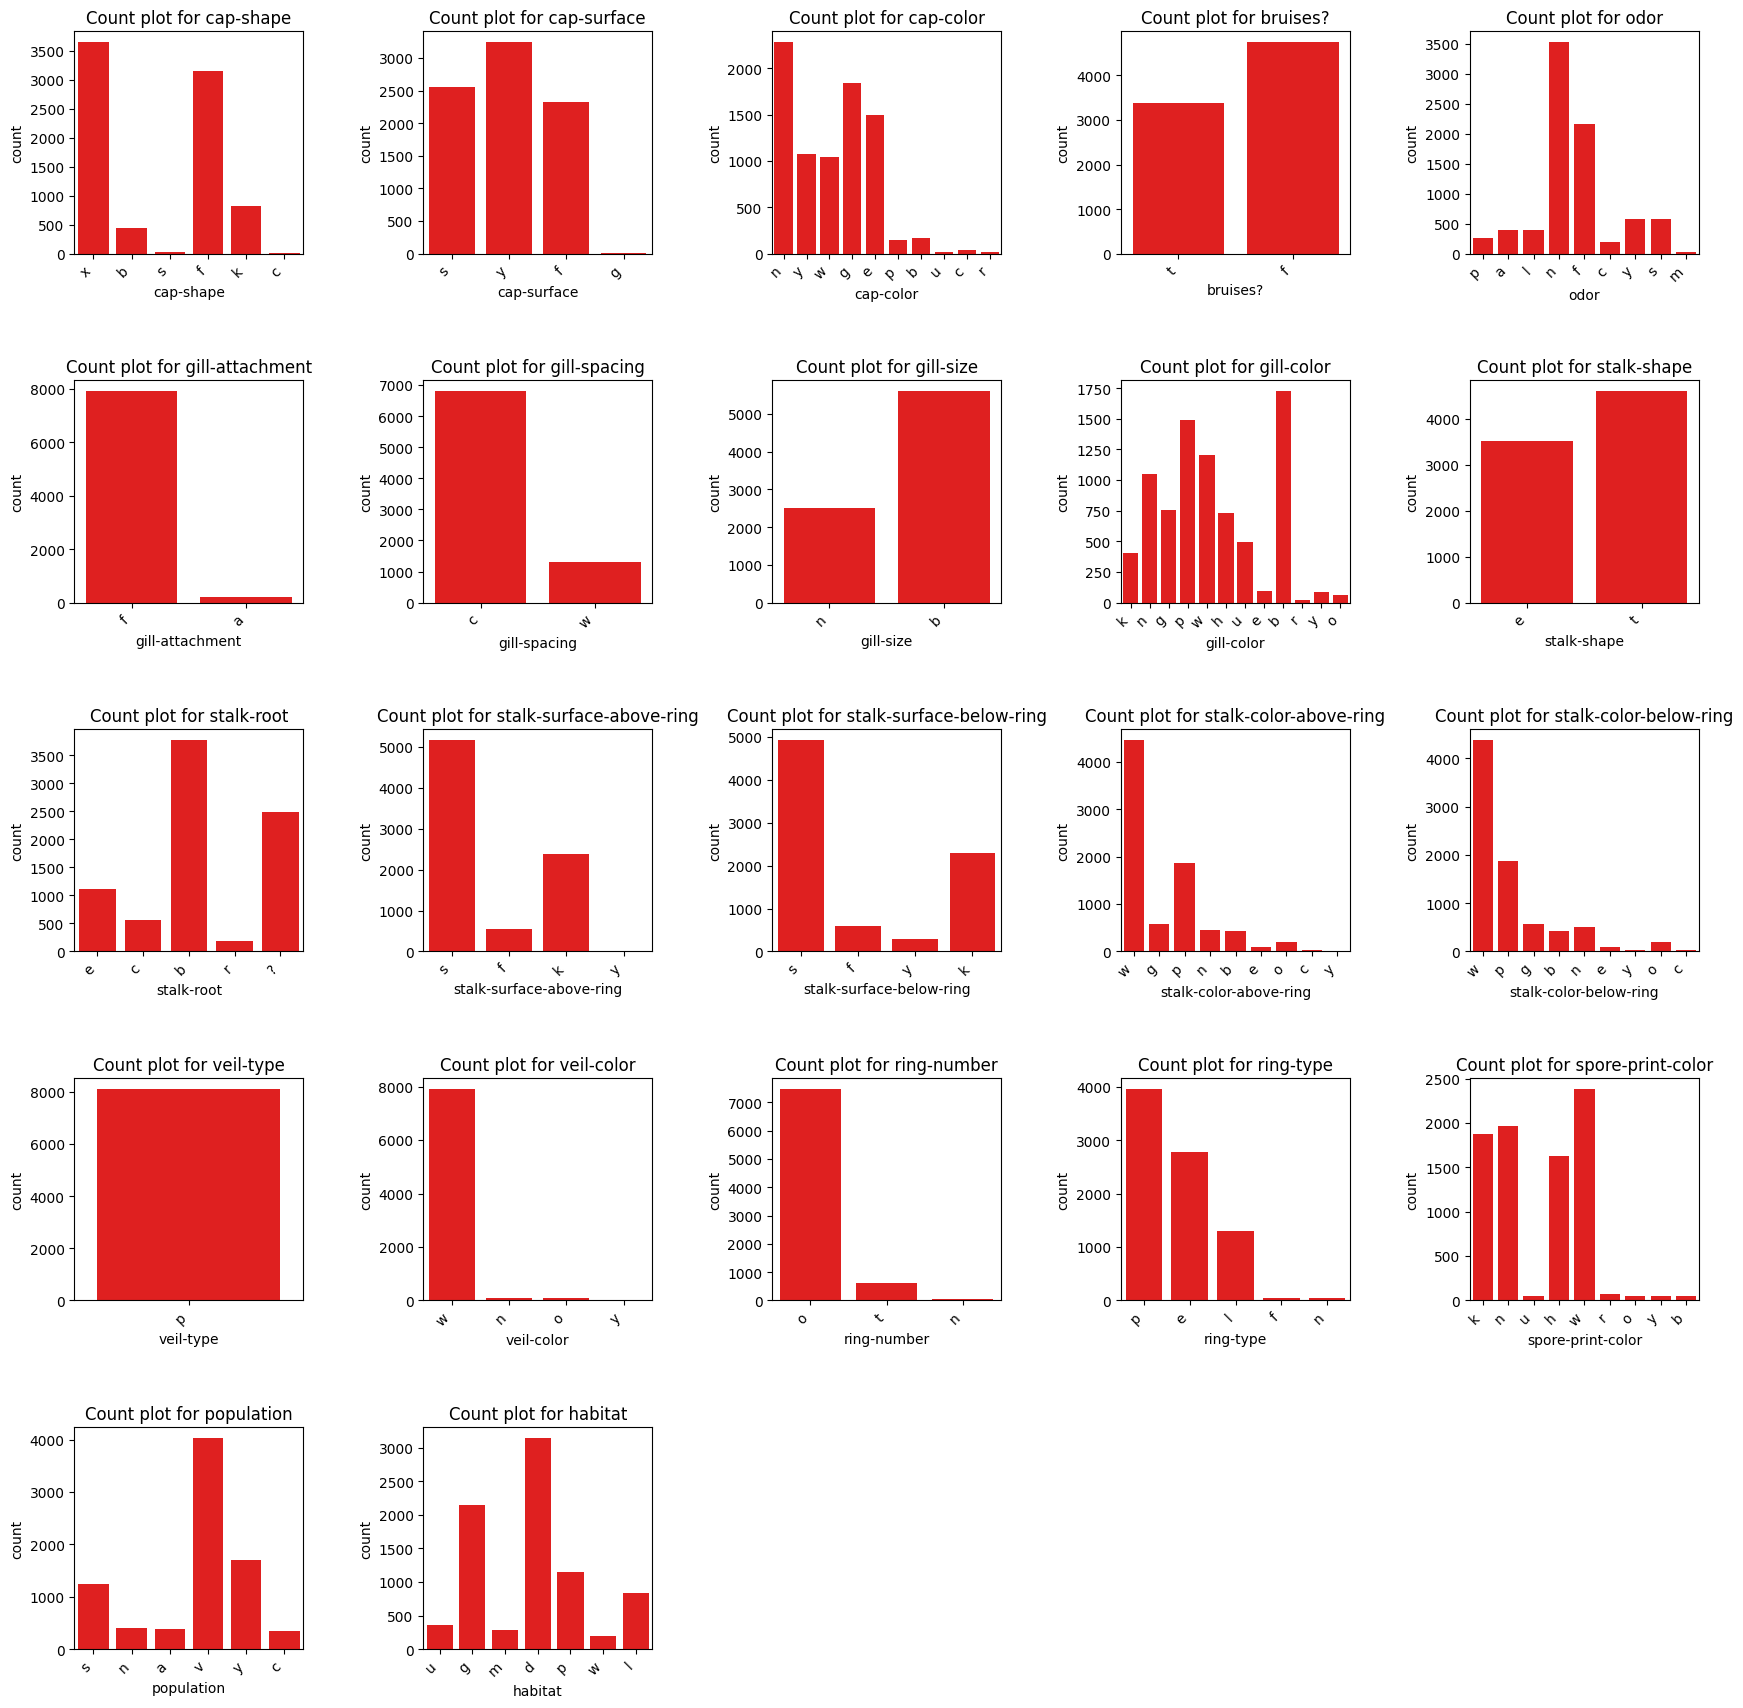

In [194]:
# For categorical variables, use countplot to visualize frequency distribution
categorical_cols = ['cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 
                    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 
                    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
                    'stalk-surface-below-ring', 'stalk-color-above-ring', 
                    'stalk-color-below-ring', 'veil-type', 'veil-color', 
                    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

# Plotting count plots for categorical features
plt.figure(figsize=(18, 18))  # Increase the figure width for more space
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(5, 5, i)
    sns.countplot(data=df, x=col, color='red')  # Set color to red
    plt.title(f'Count plot for {col}', fontsize=12)  # Keep the full title
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout(pad=4.0)  # Increase space between subplots
plt.show()

### 2.2 Handle Missing Values and Clean Data
#### Handling Missing Data

In [195]:
# Assuming df is your DataFrame
# 1. Replace "?" with NaN
df.replace("?", np.nan, inplace=True)

# 2. Handle missing data
df.fillna(df.mode().iloc[0], inplace=True)  # This will fill missing values with the most frequent value (mode)


# 3. Convert categorical columns to numerical format using encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# List of categorical columns
categorical_columns = ['bruises?', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shape', 
                       'stalk-root', 'veil-type', 'ring-number']

# Label encode the categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# One-Hot Encoding for other categorical columns
df = pd.get_dummies(df, columns=['cap-shape', 'cap-surface', 'cap-color', 'odor', 
                                 'gill-color', 'stalk-surface-above-ring', 
                                 'stalk-surface-below-ring', 'stalk-color-above-ring', 
                                 'stalk-color-below-ring', 'veil-color', 'ring-type', 
                                 'spore-print-color', 'population', 'habitat'])

# Display the cleaned data
print(df.head())

   bruises?  gill-attachment  gill-spacing  gill-size  stalk-shape  \
p         1                1             0          1            0   
e         1                1             0          0            0   
e         1                1             0          0            0   
p         1                1             0          1            0   
e         0                1             1          0            1   

   stalk-root  veil-type  ring-number  cap-shape_b  cap-shape_c  ...  \
p           2          0            1        False        False  ...   
e           1          0            1        False        False  ...   
e           1          0            1         True        False  ...   
p           2          0            1        False        False  ...   
e           2          0            1        False        False  ...   

   population_s  population_v  population_y  habitat_d  habitat_g  habitat_l  \
p          True         False         False      False      False 

#### Convert Categorical Data to Numerical Format using Encoding

In [196]:
# Example DataFrame (replace with your actual dataframe)
df = pd.read_csv(r'C:\Projects\applied-ml-projects\ml-04-mushroom-classification\mushroom_dataset\agaricus-lepiota.data', header=0)# Load your dataset

# Columns to be label encoded (binary/ordinal)
label_columns = ['bruises?', 'gill-size', 'veil-type', 'ring-number', 'gill-attachment']

# Initialize LabelEncoder
label_encoders = {}

for column in label_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Now your DataFrame has the categorical variables encoded as numerical values

# Example to view the encoded values
for column in label_columns:
    print(f"{column}: {df[column].unique()}")



bruises?: [1 0]
gill-size: [1 0]
veil-type: [0]
ring-number: [1 2 0]
gill-attachment: [1 0]


Encoding Key:
* bruises?
    * 1: Yes
    * 0: No

* gill-size
    * 1: Large
    * 0: Small

* veil-type
    * 0: Universal 

* ring-number
    * 2: Two rings
    * 1: One ring
    * 0: No rings

* gill-attachment
    * 1: Attached
    * 0: Free

## 💭 Reflection 2: What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?

1. Patterns or Anomalies:
    * After encoding, the data shows a clear distinction between categorical values (like bruises?, gill-attachment, ring-number) being converted into binary or multi-class numerical values.
    * Veil-type appeared to have only one category (universal) in the dataset, making it redundant and not useful as a predictor for the model, which is why it's been encoded as 0.
    * Gill-size had a binary split (1 for large, 0 for small), indicating two clear categories, with "large" being encoded as 1 and "small" as 0.


2. Features that Stand Out:
    * The bruises? feature seems to be important since it's binary (1 for "Yes", 0 for "No") and could significantly affect whether the mushroom is poisonous or not. A bruise could be a key indicator of toxicity in mushrooms.
    * Ring-number also shows meaningful categorization (0, 1, 2), which could be linked to the type of mushroom, further influencing whether it is poisonous.
    * Gill-size provides a binary split, and this could also differentiate between edible and poisonous mushrooms. It is a feature worth considering for classification.


3. Preprocessing Steps:
    * Handling Missing Data: Missing values were addressed by ensuring that the dataset was complete. This step was necessary to ensure the accuracy of the model and that no information was lost.
    * Label Encoding: Categorical variables were converted into numerical values using label encoding for binary or ordinal features, which is a necessary step to allow models (like decision trees or logistic regression) to process these features effectively. Features like bruises?, gill-attachment, and ring-number were encoded into numerical format to be used in the model.


4. Feature Creation or Modifications:
    * No New Features Were Created: We didn’t create new features by combining others or engineering new ones.
    * No Further Feature Modification: Aside from encoding the categorical data, no other transformations, scaling, or normalization were done, as the dataset appeared to be relatively clean and suitable for classification as-is.

---

In [197]:

# Assuming you already have a DataFrame 'df' with your features and target variable
X = df.drop(columns=['target'])  # Replace with your target column name
y = df['target']

# Train a Random Forest model
rf = RandomForestClassifier()
rf.fit(X, y)

# Get feature importance
importance = rf.feature_importances_

# Create a DataFrame with feature names and their importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

KeyError: "['target'] not found in axis"